In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import calc_pc_3

In [3]:
lipidated = False

if lipidated:
    headgroup_atom_dict = {
    "S":[1],
    "O":[2,3,4],
    "N":[1,2],
    "C":[21, 23, 15, 16, 24, 14, 12, 13, 11, 17, 18, 22, 20],
    "H":[38, 39, 40, 31, 30, 24, 25, 26, 35, 36, 37, 32, 33, 34, 27, 28, 29]}
else:
    headgroup_atom_dict = {
    "S":[1],
    "O":[1,3], #2
    "N":[1,4],
    "C":[13, 15, 5, 6, 16, 7, 4, 2, 1, 3, 8, 14], #12
    "H":[7,8,18,19,20,4,5,6,1,2,3,9,10,11,15,16,17]}

In [6]:
queries_by_elem = [k+str(e_num) for k, v in headgroup_atom_dict.items() for e_num in v]
print(queries_by_elem)
esele = "+".join(queries_by_elem)
print(f"hide sticks, not name {esele}")

['S1', 'O1', 'O3', 'N1', 'N4', 'C13', 'C15', 'C5', 'C6', 'C16', 'C7', 'C4', 'C2', 'C1', 'C3', 'C8', 'C14', 'H7', 'H8', 'H18', 'H19', 'H20', 'H4', 'H5', 'H6', 'H1', 'H2', 'H3', 'H9', 'H10', 'H11', 'H15', 'H16', 'H17']
hide sticks, not name S1+O1+O3+N1+N4+C13+C15+C5+C6+C16+C7+C4+C2+C1+C3+C8+C14+H7+H8+H18+H19+H20+H4+H5+H6+H1+H2+H3+H9+H10+H11+H15+H16+H17


In [ ]:

lipidated = True

bicyclic_ring_atom_names_glpg1837 =  {  'S':[0],\
                                        'C':[1, 2, 3, 4, 5, 6, 7, 8, 14,13,15,16],\
                                        'O':[1,3],\
                                        'N':[4,1],\
                                        'H':[1,2,3, 4,5,6, 9,10,11, 15,16,17, 7,8, 18,19, 20]}

bicyclic_ring_atom_names_lipidated = {  'S':[0],\
                                        'C':[i for i in range(1,13)],\
                                        'O':[1,2],\
                                        'N':[1,2],\
                                        'H':[i for i in range(23,41)]} 

if not lipidated:
    atomlist = bicyclic_ring_atom_names_glpg1837
else:
    atomlist = bicyclic_ring_atom_names_lipidated

atom_query = []
for k in atomlist.keys():
    for ki in atomlist[k]:
        if ki == 0:
            atom_query.append(k)
        else:
            atom_query.append(k+str(ki))

query = " or ".join(["name " + qi for qi in atom_query])


print(f"hide sticks; show sticks, resn LJP and ({query})")

hide sticks; show sticks, resn LJP and (name S or name C1 or name C2 or name C3 or name C4 or name C5 or name C6 or name C7 or name C8 or name C9 or name C10 or name C11 or name C12 or name O1 or name O2 or name N2 or name N1 or name H23 or name H24 or name H25 or name H26 or name H27 or name H28 or name H29 or name H30 or name H31 or name H32 or name H33 or name H34 or name H35 or name H36 or name H37 or name H38 or name H39 or name H40)


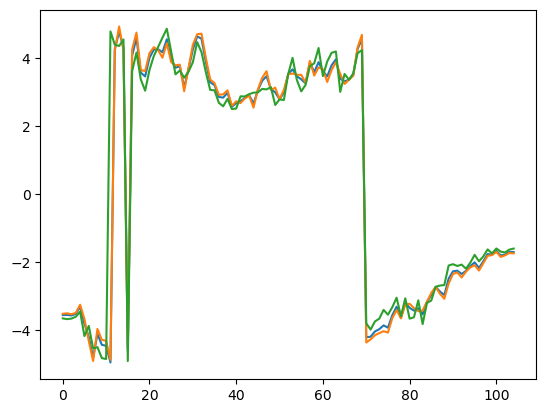

In [2]:
#----------load trajectory----------
trj_path = "/home/jonathan/Documents/grabelab/cftr/ligand-simulations/nonlipidated/equil/run23/run/all_dynamics_segs_mol.xtc"
top = "/home/jonathan/Documents/grabelab/cftr/ligand-simulations/nonlipidated/equil/run23/input/step5_input.gro"

trj = md.load(trj_path, top=top)

pc_trj = np.array([calc_pc_3.__calc_pc(trj, i) for i in range(0, trj.n_frames,10)])
plt.plot(pc_trj[:,0])
plt.plot(pc_trj[:,1])
plt.plot(pc_trj[:,2])


In [ ]:
a = np.concatenate((np.linspace(-5,-3,11), np.linspace(-3,3,61)[1:-1], np.linspace(3,5,11)))

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ])

In [17]:
list(a)

[-5.0,
 -4.8,
 -4.6,
 -4.3999999999999995,
 -4.199999999999999,
 -3.999999999999999,
 -3.799999999999999,
 -3.5999999999999988,
 -3.3999999999999986,
 -3.1999999999999984,
 -3.0,
 -2.9,
 -2.8,
 -2.6999999999999997,
 -2.5999999999999996,
 -2.4999999999999996,
 -2.3999999999999995,
 -2.2999999999999994,
 -2.1999999999999993,
 -2.099999999999999,
 -1.9999999999999991,
 -1.899999999999999,
 -1.799999999999999,
 -1.6999999999999988,
 -1.5999999999999988,
 -1.4999999999999987,
 -1.3999999999999986,
 -1.2999999999999985,
 -1.1999999999999984,
 -1.0999999999999983,
 -0.9999999999999982,
 -0.8999999999999981,
 -0.799999999999998,
 -0.699999999999998,
 -0.5999999999999979,
 -0.4999999999999978,
 -0.3999999999999977,
 -0.2999999999999976,
 -0.1999999999999975,
 -0.09999999999999742,
 2.6645352591003757e-15,
 0.10000000000000275,
 0.20000000000000284,
 0.30000000000000293,
 0.400000000000003,
 0.5000000000000031,
 0.6000000000000032,
 0.7000000000000033,
 0.8000000000000034,
 0.9000000000000035,
 